# Lab 6 - Principal Component Analysis

#### A large part of the code was taken from <br>
#### 1. https://github.com/ageron/handson-ml <br>
#### 2. https://www.kaggle.com/residentmario/dimensionality-reduction-and-pca-for-fashion-mnist

In [221]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Load the Fashion MNIST dataset

In [222]:
from keras.datasets import fashion_mnist
(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()

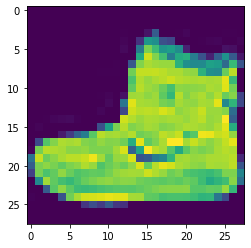

In [223]:
plt.imshow(X_train[0])

In [224]:
X_train.shape

(60000, 28, 28)

In [225]:
X_train=X_train.reshape(60000, 28*28)

In [226]:
X_train.shape

(60000, 784)

#### Projecting down to d = 4 dimensions

In [227]:
pca = PCA(n_components = 4)
X_train_pca=pca.fit_transform(X_train)


#### Explained Variance Ratio

In [228]:
pca.explained_variance_ratio_


array([0.29039228, 0.1775531 , 0.06019222, 0.04957428])

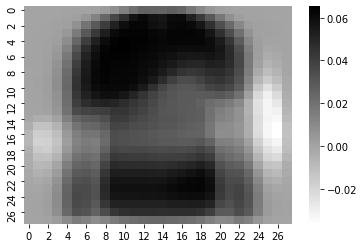

In [229]:
sns.heatmap(pca.components_[0].reshape(28, 28), cmap='gray_r')

#### Preserving the training set's variance

In [230]:
pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d1 = np.argmax(cumsum >= 0.25)+1
d2 = np.argmax(cumsum >= 0.50)+1
d3 = np.argmax(cumsum >= 0.75)+1
d4 = np.argmax(cumsum >= 1.00)+1

In [231]:
print("The number of features required to obtain -\n 1. 25% variance = ",d1," \n 2. 50% variance = ",d2," \n 1. 75% variance =", d3,"\n 4. 100% variance = ",d4)

The number of features required to obtain -
 1. 25% variance =  1  
 2. 50% variance =  3  
 1. 75% variance = 14 
 4. 100% variance =  784


#### Compressing datasets using PCA

In [232]:
pca = PCA(n_components = 14)
X_reduced = pca.fit_transform(X_train)
X_recovered = pca.inverse_transform(X_reduced)

In [233]:

def plot_digits(instances, images_per_row=5, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, **options)
    plt.axis("off")

Text(0.5, 1.0, 'Recovered after compression')

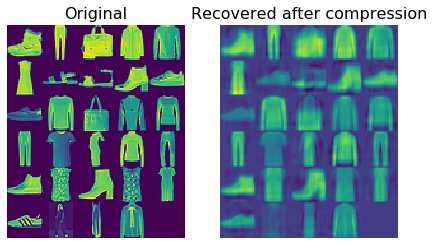

In [234]:
plt.figure(figsize=(7, 4))
plt.subplot(121)
plot_digits(X_train[::2100])
plt.title("Original", fontsize=16)
plt.subplot(122)
plot_digits(X_recovered[::2100])
plt.title("Recovered after compression", fontsize=16)

